# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv("C:/Users/THEBEST/Desktop/Jupyter_workbook/train.csv")
df.head()

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance
0,3392,1,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,Good,809.98,No,49.574949,312.494089
1,3392,2,23,19114.12,1824.843333,3,4,3,4,3,4,11.27,Good,809.98,No,49.574949,284.629163
2,3392,3,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,Good,809.98,No,49.574949,331.209863
3,3392,4,23,19114.12,1824.843333,3,4,3,4,5,4,6.27,Good,809.98,No,49.574949,223.451310
4,3392,5,23,19114.12,1824.843333,3,4,3,4,6,4,11.27,Good,809.98,No,49.574949,341.489231


# EDA 

In [3]:
df.shape

(100000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer_ID             100000 non-null  int64  
 1   Month                   100000 non-null  int64  
 2   Age                     100000 non-null  int64  
 3   Annual_Income           100000 non-null  float64
 4   Monthly_Inhand_Salary   100000 non-null  float64
 5   Num_Bank_Accounts       100000 non-null  int64  
 6   Num_Credit_Card         100000 non-null  int64  
 7   Interest_Rate           100000 non-null  int64  
 8   Num_of_Loan             100000 non-null  int64  
 9   Delay_from_due_date     100000 non-null  int64  
 10  Num_of_Delayed_Payment  100000 non-null  int64  
 11  Changed_Credit_Limit    100000 non-null  float64
 12  Credit_Mix              100000 non-null  object 
 13  Outstanding_Debt        100000 non-null  float64
 14  Payment_of_Min_Amount

In [5]:
df.isna().sum()

Customer_ID               0
Month                     0
Age                       0
Annual_Income             0
Monthly_Inhand_Salary     0
Num_Bank_Accounts         0
Num_Credit_Card           0
Interest_Rate             0
Num_of_Loan               0
Delay_from_due_date       0
Num_of_Delayed_Payment    0
Changed_Credit_Limit      0
Credit_Mix                0
Outstanding_Debt          0
Payment_of_Min_Amount     0
Total_EMI_per_month       0
Monthly_Balance           0
dtype: int64

We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

In [10]:
df.duplicated().sum()

0

In [11]:
# define numerical value as "numeric"
numeric = df.loc[:, (df.dtypes != 'object')].columns.tolist()
numeric

['Customer_ID',
 'Month',
 'Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Total_EMI_per_month',
 'Monthly_Balance']

In [12]:
# define categorical data as 'categoric'
categoric = df.loc[:, (df.dtypes != 'int64') & (df.dtypes != 'float64')].columns.tolist()
categoric

['Credit_Mix', 'Payment_of_Min_Amount']

In [13]:
# Analyzing statistical summary (numerical data)
df.describe()

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,25982.666640,4.500000,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,1426.220376,107.699208,392.697586
std,14340.543051,2.291299,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,1155.129026,132.267056,201.652719
min,1006.000000,1.000000,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.230000,0.000000,0.007760
25%,13664.500000,2.750000,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,566.072500,29.268886,267.615983
50%,25777.000000,4.500000,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,1166.155000,66.462304,333.865366
75%,38385.000000,6.250000,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,1945.962500,147.392573,463.215683
max,50999.000000,8.000000,56.000000,179987.280000,15204.633330,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,4998.070000,1779.103254,1183.930696


In [15]:
# dropping CUST_ID, Month column because it is not used
df.drop(columns=["Customer_ID", "Month"],axis=1,inplace=True)

In [16]:
df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Monthly_Balance'],
      dtype='object')

# Univariate Analysis

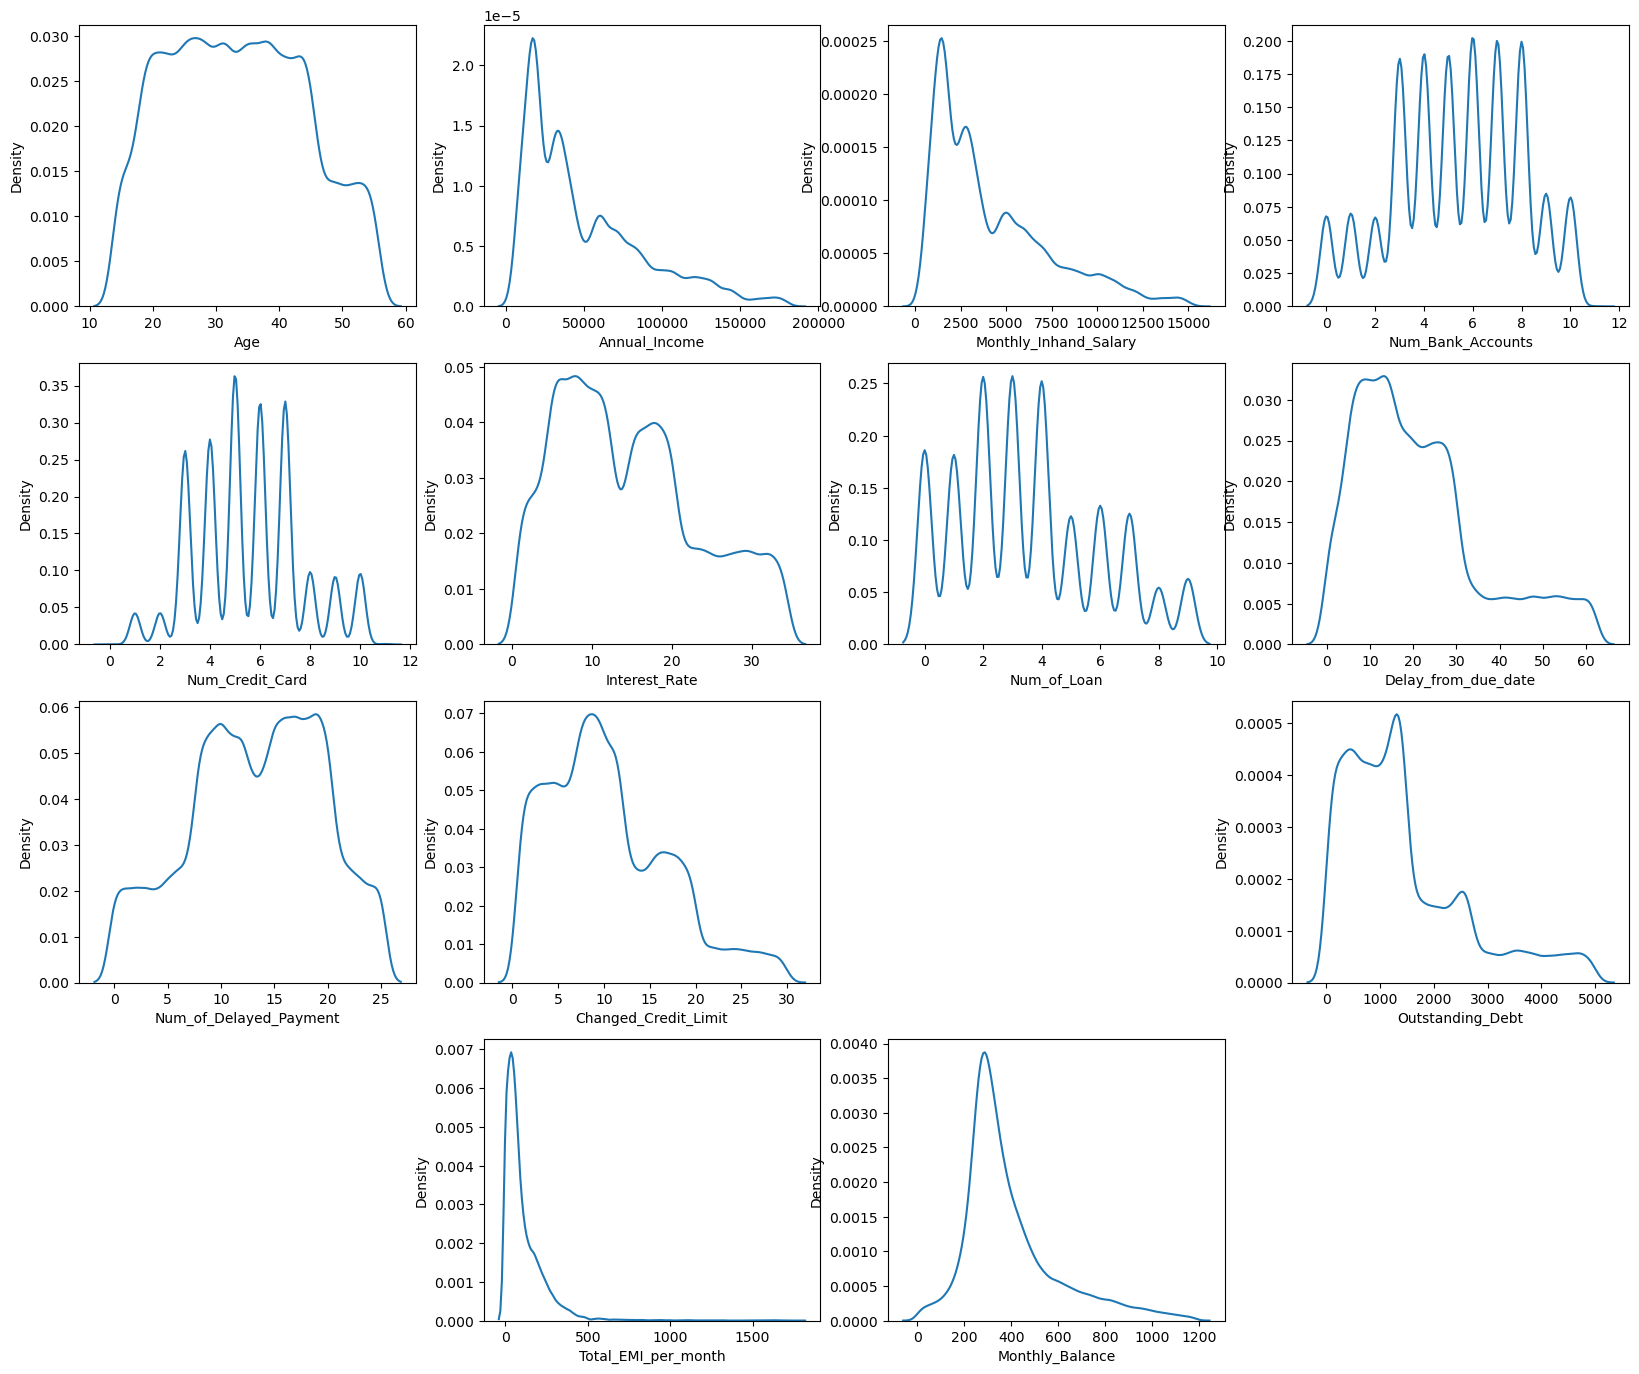

In [17]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(7, 4, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)    
plt.show()

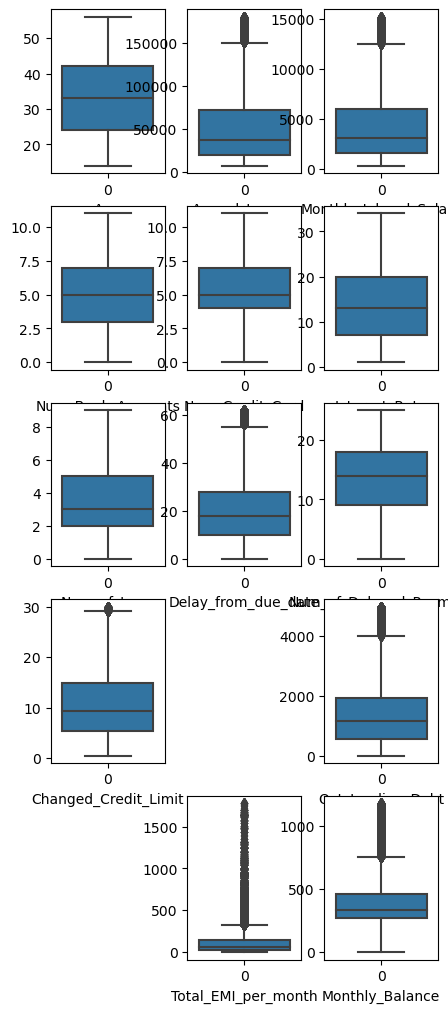

In [22]:
# Plotting boxplot for numerical data 
plt.figure(figsize=(5, 20))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(8, 3, i+1)
        sns.boxplot(df[col], ax=ax)
        plt.xlabel(col)    
plt.show()

# Multivariate Anlysis

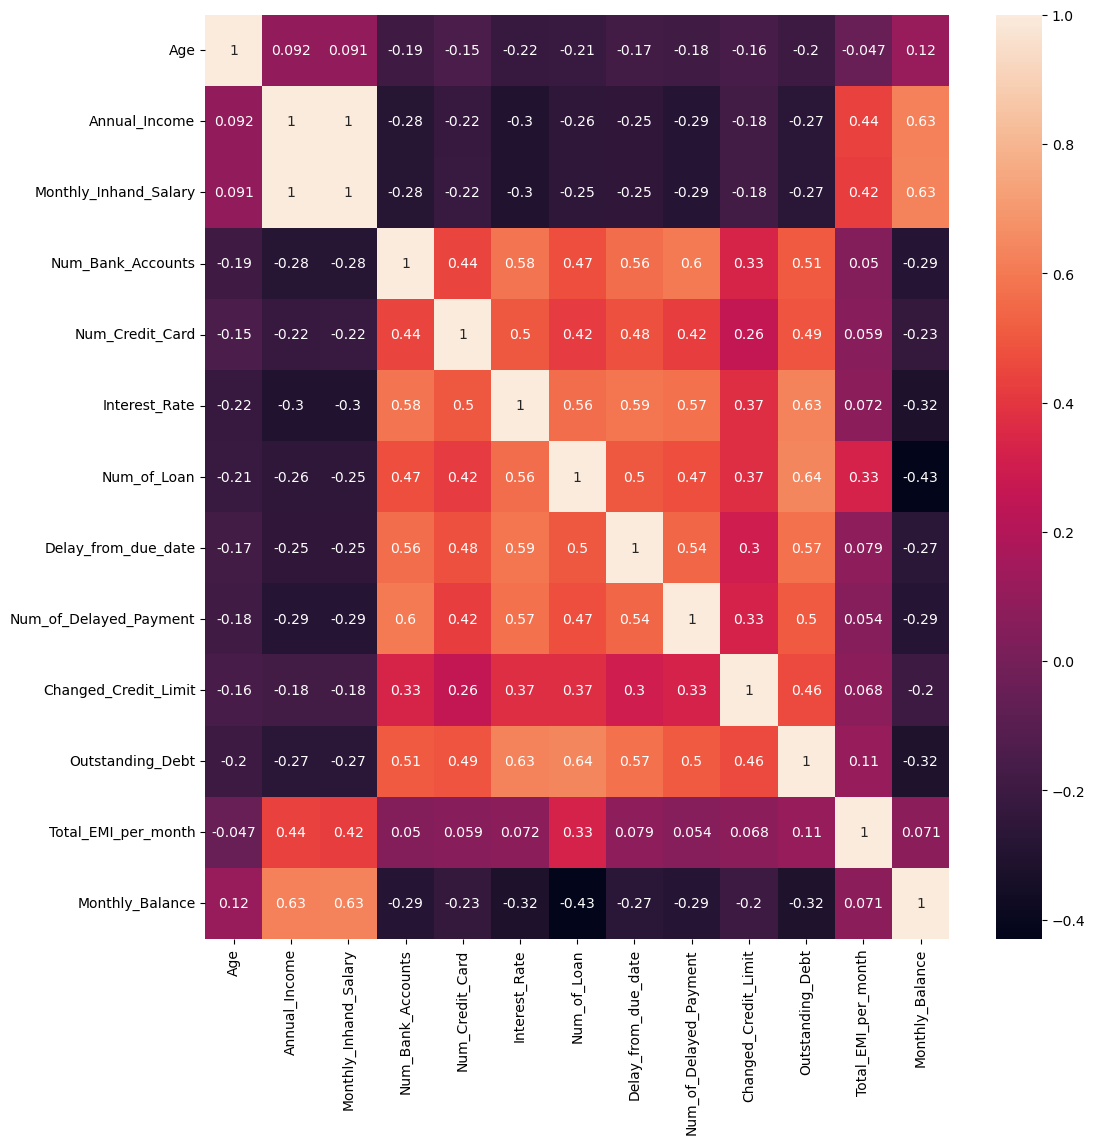

In [23]:
# plotting heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [25]:
unique_Credit_Mix = df['Credit_Mix'].unique()

# Display unique values
print(unique_Credit_Mix)

['Good' 'Standard' 'Bad']


In [26]:
df["Credit_Mix"] = df["Credit_Mix"].map({"Standard": 1, 
                               "Good": 2, 
                               "Bad": 0})

In [27]:
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].map({"NM": 1, 
                               "Yes": 2, 
                               "No": 0})

In [28]:
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,2,809.98,0,49.574949,312.494089
1,23,19114.12,1824.843333,3,4,3,4,3,4,11.27,2,809.98,0,49.574949,284.629163
2,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,2,809.98,0,49.574949,331.209863
3,23,19114.12,1824.843333,3,4,3,4,5,4,6.27,2,809.98,0,49.574949,223.451310
4,23,19114.12,1824.843333,3,4,3,4,6,4,11.27,2,809.98,0,49.574949,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,4,6,7,2,23,7,11.50,2,502.38,0,35.104023,479.866228
99996,25,39628.99,3359.415833,4,6,7,2,18,7,11.50,2,502.38,0,35.104023,496.651610
99997,25,39628.99,3359.415833,4,6,7,2,27,6,11.50,2,502.38,0,35.104023,516.809083
99998,25,39628.99,3359.415833,4,6,7,2,20,6,11.50,2,502.38,0,35.104023,319.164979


# Scaling the DataFrame

In [29]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scaled_df = scalar.fit_transform(df)


# Dimensionality reduction

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,1.918868,-1.829162
1,2.032045,-1.910777
2,1.938558,-1.799246
3,2.086832,-2.059310
4,2.033114,-1.798284
...,...,...
99995,1.750559,-0.915605
99996,1.866136,-0.924780
99997,1.758588,-0.840106
99998,1.687742,-1.206444


# Hyperparameter tuning
Finding 'k' value by Elbow Method

In [32]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

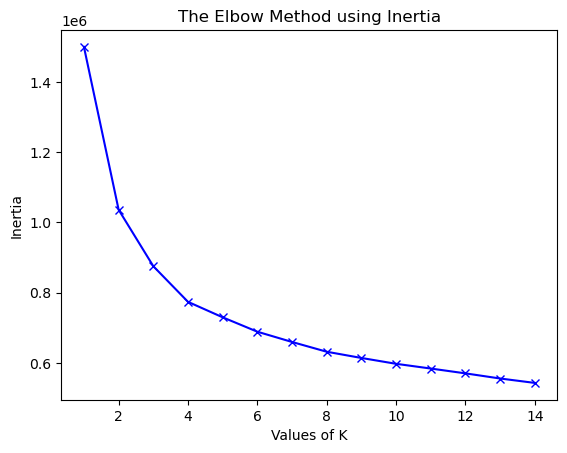

In [33]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

# Model Building using KMeans

In [135]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'Group':kmeans_model.labels_})],axis=1)

# Visualizing the clustered dataframe

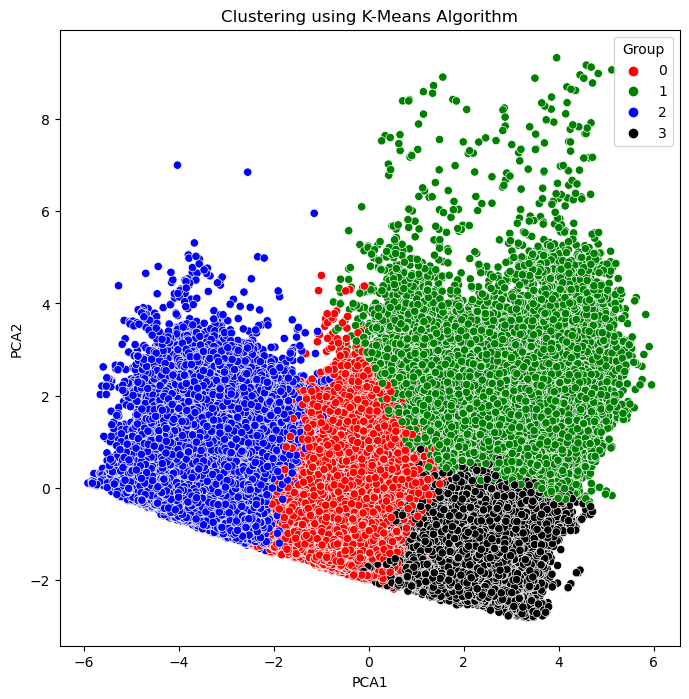

In [35]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="Group",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [36]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance
0,31.508941,38090.954803,3169.319520,5.610953,5.200858,14.803530,3.286572,18.067173,14.216001,12.456667,0.985846,1100.308071,1.796371,82.644600,344.870537
1,35.967779,115252.255130,9572.059305,3.730761,4.546602,8.622571,2.117302,12.899715,9.347678,7.584871,1.623065,740.337696,0.509002,186.299004,675.782069
2,29.681150,32925.048499,2737.246674,7.956700,7.561851,24.727249,6.233072,38.704666,19.248488,14.125490,0.131579,2896.888927,1.879582,134.803450,281.518315
3,37.524471,37041.077366,3077.157201,3.471639,4.469127,7.494692,1.949396,11.693542,8.689004,6.193488,1.768131,736.430333,0.104692,51.032465,363.157735


In [37]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Group':kmeans_model.labels_})],axis=1)
cluster_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Group
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,2,809.98,0,49.574949,312.494089,3
1,23,19114.12,1824.843333,3,4,3,4,3,4,11.27,2,809.98,0,49.574949,284.629163,3
2,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,2,809.98,0,49.574949,331.209863,3
3,23,19114.12,1824.843333,3,4,3,4,5,4,6.27,2,809.98,0,49.574949,223.451310,3
4,23,19114.12,1824.843333,3,4,3,4,6,4,11.27,2,809.98,0,49.574949,341.489231,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,4,6,7,2,23,7,11.50,2,502.38,0,35.104023,479.866228,3
99996,25,39628.99,3359.415833,4,6,7,2,18,7,11.50,2,502.38,0,35.104023,496.651610,3
99997,25,39628.99,3359.415833,4,6,7,2,27,6,11.50,2,502.38,0,35.104023,516.809083,3
99998,25,39628.99,3359.415833,4,6,7,2,20,6,11.50,2,502.38,0,35.104023,319.164979,3


In [38]:
cluster_df['Group'] = cluster_df['Group'].replace(to_replace=0, value='Group_A')

In [46]:
cluster_df['Group'] = cluster_df['Group'].replace(to_replace=1, value='Group_B')

In [43]:
cluster_df['Group'] = cluster_df['Group'].replace(to_replace=2, value='Group_C')

In [41]:
cluster_df['Group'] = cluster_df['Group'].replace(to_replace=3, value='Group_D')

In [47]:
cluster_df['Group']

0        Group_D
1        Group_D
2        Group_D
3        Group_D
4        Group_D
          ...   
99995    Group_D
99996    Group_D
99997    Group_D
99998    Group_D
99999    Group_D
Name: Group, Length: 100000, dtype: object

In [53]:
cluster_df.tail(10)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Group
99990,28,20002.88,1929.906667,10,8,29,5,33,25,18.31,0,3571.70,2,60.964772,228.750392,Group_C
99991,29,20002.88,1929.906667,10,8,29,5,33,25,18.31,0,3571.70,2,60.964772,337.362988,Group_C
99992,24,39628.99,3359.415833,4,6,7,2,23,6,9.50,2,502.38,0,35.104023,189.641080,Group_D
99993,25,39628.99,3359.415833,4,6,7,2,23,6,11.50,2,502.38,0,35.104023,400.104466,Group_D
99994,25,39628.99,3359.415833,4,6,7,2,20,6,9.50,2,502.38,0,35.104023,410.256158,Group_D
99995,25,39628.99,3359.415833,4,6,7,2,23,7,11.50,2,502.38,0,35.104023,479.866228,Group_D
99996,25,39628.99,3359.415833,4,6,7,2,18,7,11.50,2,502.38,0,35.104023,496.651610,Group_D
99997,25,39628.99,3359.415833,4,6,7,2,27,6,11.50,2,502.38,0,35.104023,516.809083,Group_D
99998,25,39628.99,3359.415833,4,6,7,2,20,6,11.50,2,502.38,0,35.104023,319.164979,Group_D
99999,25,39628.99,3359.415833,4,6,7,2,18,6,11.50,2,502.38,0,35.104023,393.673696,Group_D


In [54]:
cluster_1_df = cluster_df[cluster_df["Group"]==0]
cluster_1_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Group


In [55]:
cluster_2_df = cluster_df[cluster_df["Group"]==1]
cluster_2_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Group


In [56]:
cluster_3_df = cluster_df[cluster_df["Group"]==2]
cluster_3_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Group


In [57]:
cluster_4_df = cluster_df[cluster_df["Group"] == 3]
cluster_4_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Group


<Axes: xlabel='Group', ylabel='count'>

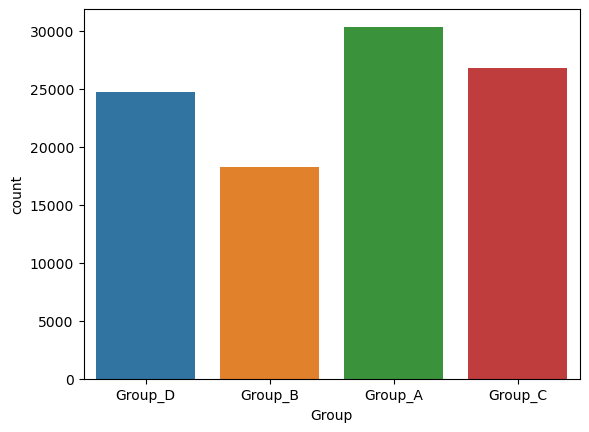

In [59]:
#Visualization
sns.countplot(x='Group', data=cluster_df)

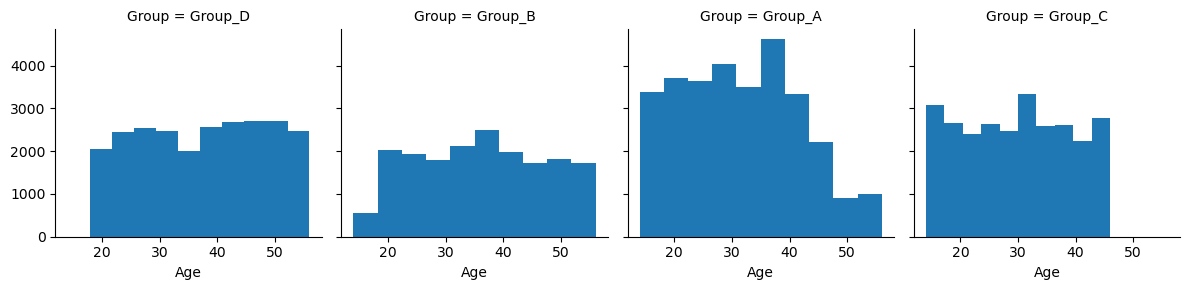

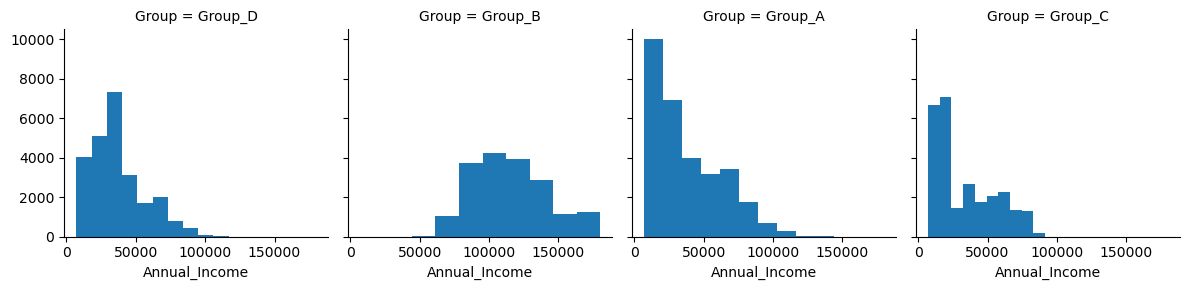

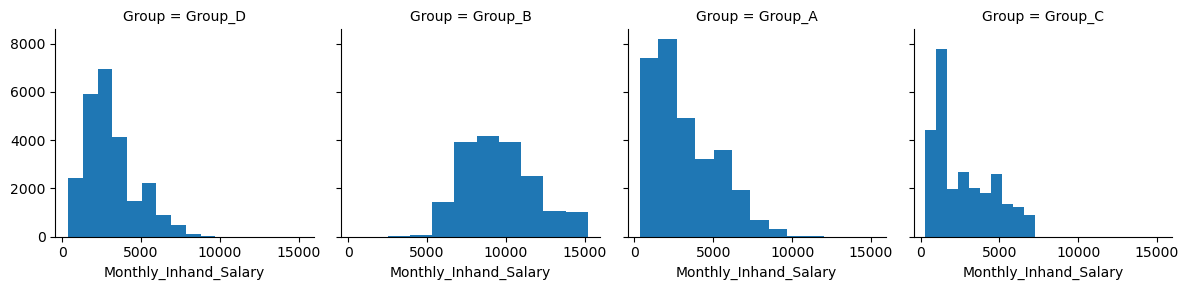

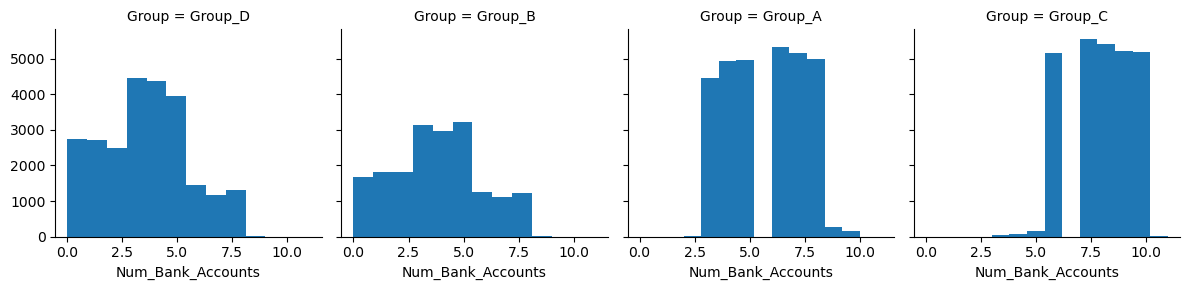

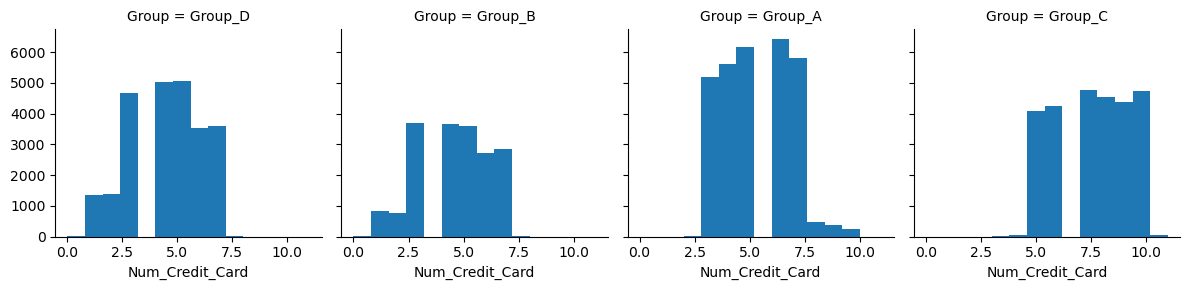

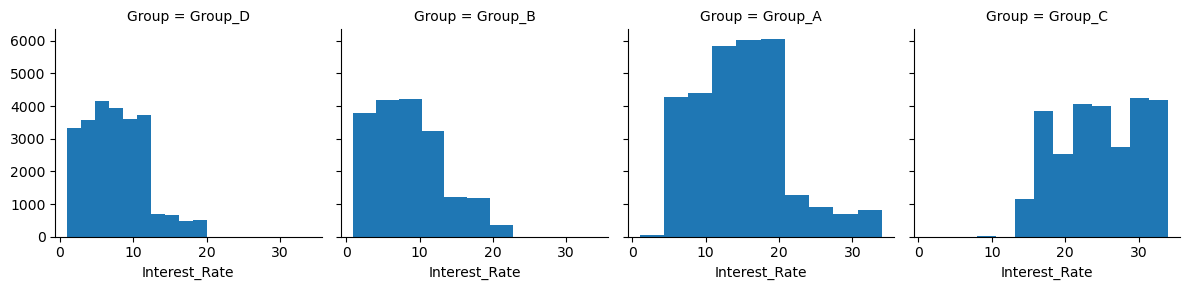

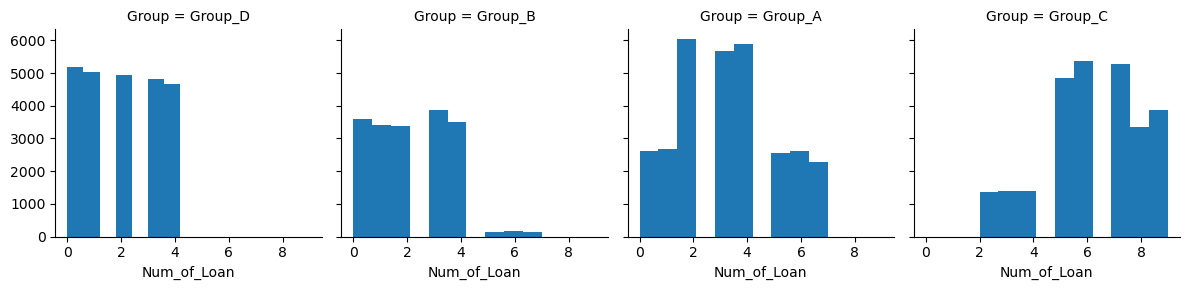

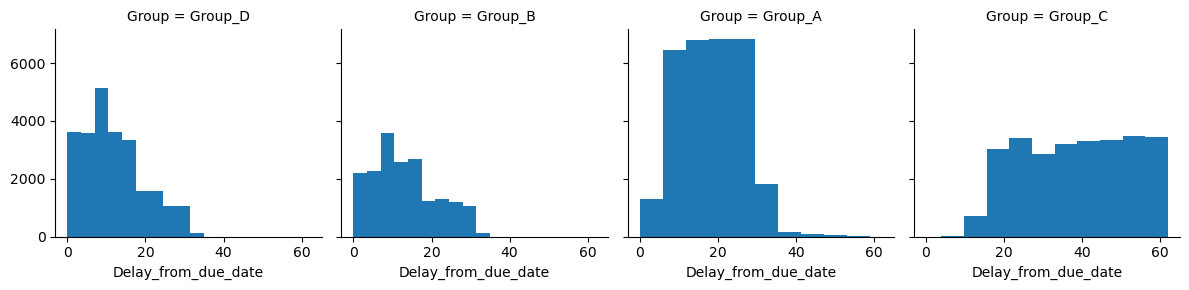

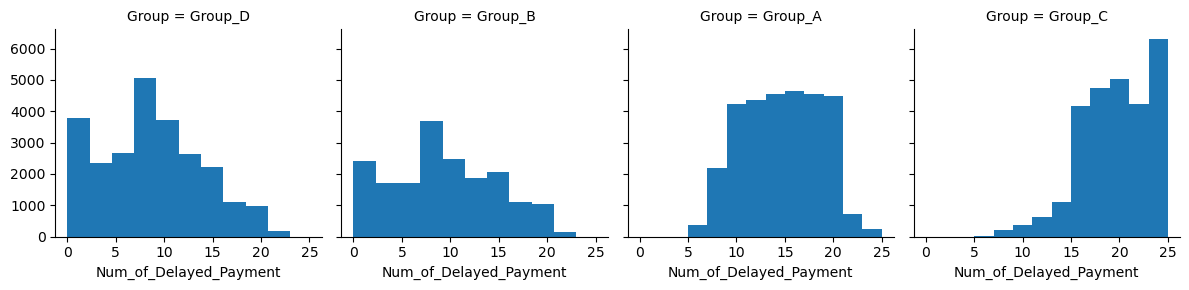

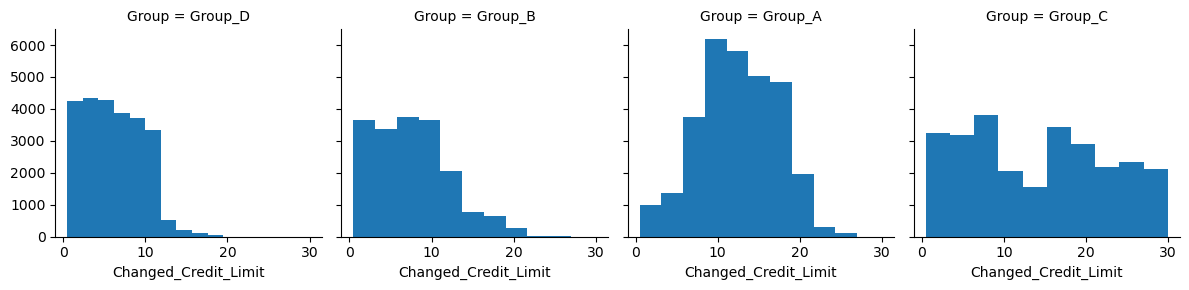

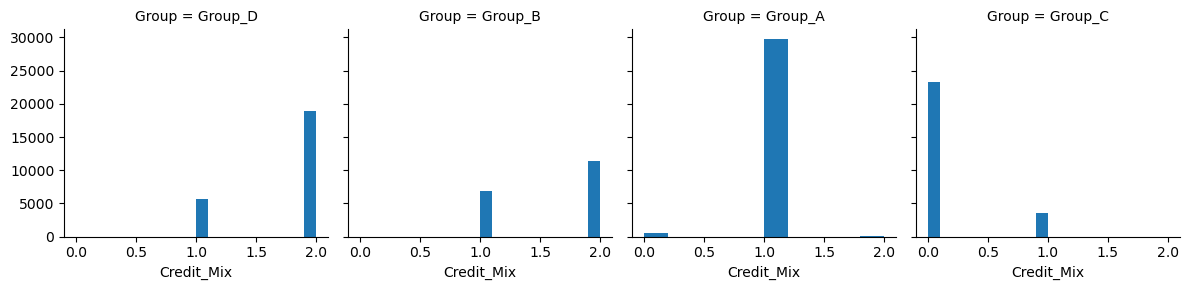

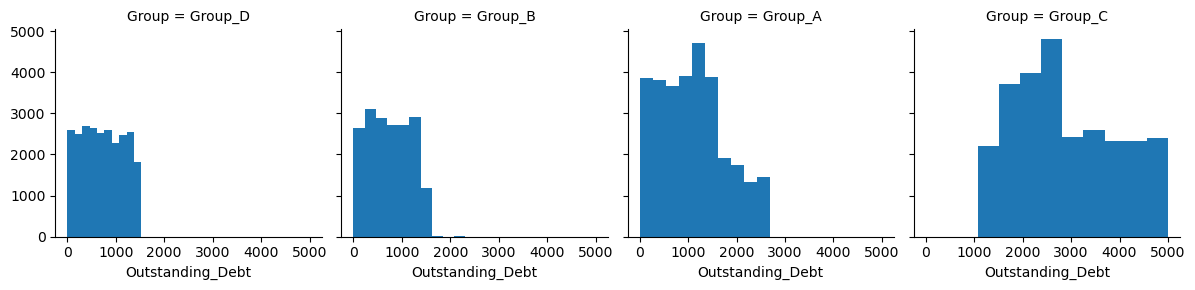

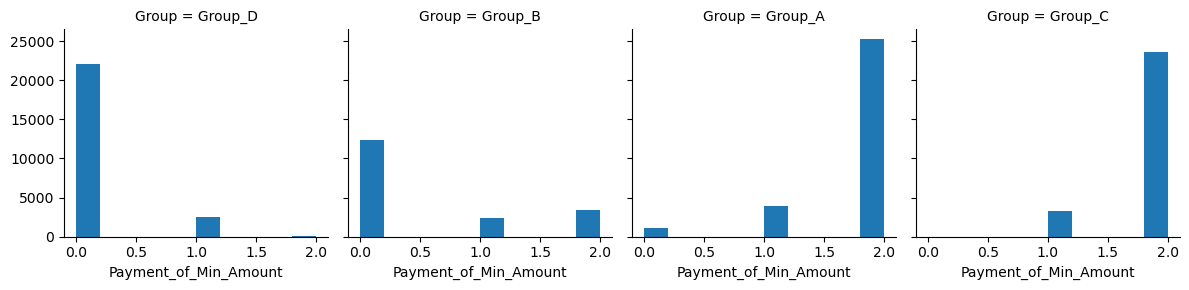

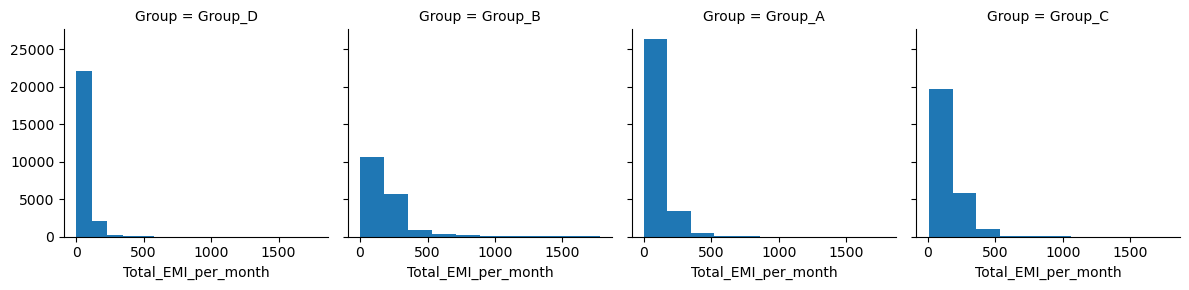

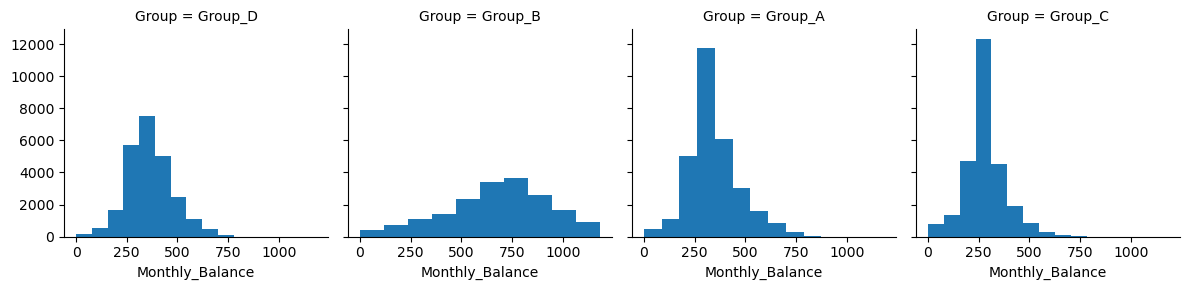

In [60]:
for c in cluster_df.drop(['Group'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Group')
    grid= grid.map(plt.hist, c)
plt.show()

# Saving the kmeans clustering model and the data with cluster label

In [61]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [62]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

# Training and Testing the model accuracy using decision tree

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
#Split Dataset
X = cluster_df.drop(['Group'],axis=1)
y= cluster_df[['Group']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [65]:
X_train

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance
82869,28,44332.620,3691.385000,9,8,28,3,20,22,15.94,0,2380.89,2,75.716929,449.875458
93697,19,20436.315,1785.026250,1,3,7,2,14,1,4.86,2,783.77,0,20.366032,318.942844
29675,32,50686.320,4451.860000,5,4,19,2,30,13,14.01,1,145.46,2,61.686737,351.161393
33334,18,74380.960,6374.413333,4,6,27,4,9,8,16.51,1,1768.05,2,203.082308,53.584253
89222,30,69362.920,5944.243333,6,6,9,2,23,7,11.41,1,1042.95,2,67.553516,359.979141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35670,28,61389.180,5085.765000,10,6,34,6,34,17,24.77,0,3051.79,2,156.440598,320.179927
92808,41,81887.800,7079.983333,5,3,26,6,27,14,10.30,1,1882.85,2,407.478501,101.518518
1528,18,113781.390,9549.782500,1,4,1,0,14,7,11.34,2,1030.20,0,0.000000,837.736404
13457,19,30922.500,2477.875000,8,8,26,9,61,21,21.83,0,4742.53,2,165.891821,275.844573


In [66]:
X_test

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance
73200,44,122161.960,10153.163330,7,5,15,4,8,20,14.15,1,1316.32,1,278.852171,749.717859
48765,38,32955.920,2890.326667,6,6,8,2,28,10,14.35,1,315.72,2,29.865025,276.128983
31975,52,63383.100,5443.925000,6,3,8,3,26,16,7.54,1,549.06,2,151.434249,117.610771
7900,39,65934.220,5454.518333,5,7,7,0,15,15,13.25,1,1123.00,2,0.000000,597.678656
65058,45,47400.200,4192.016667,8,7,5,0,28,9,14.88,1,465.95,2,0.000000,568.417596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59424,40,70154.850,5696.237500,8,5,18,2,27,11,19.23,1,487.42,2,92.888270,492.572881
26987,56,32937.830,2519.819167,8,6,11,4,20,15,4.95,1,134.09,0,79.585709,337.073894
5424,41,8406.375,944.531250,9,5,25,9,44,20,5.80,0,1853.17,2,44.005211,271.670072
36492,18,17438.800,1237.233333,8,11,16,5,21,13,13.68,0,2635.91,2,44.235326,290.591953


In [67]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logr_liblinear = LogisticRegression(verbose=1,solver='liblinear')

In [68]:
logr_liblinear.fit(X_train,y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [69]:
logr_liblinear.score(X_train,y_train)

0.8336857142857143

In [70]:
Y_pred_log=logr_liblinear.predict(X_test)

In [71]:
Y_pred_log1=logr_liblinear.predict(X_train)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(y_test,Y_pred_log)

array([[6704,  279, 1199, 1001],
       [ 154, 5158,    3,  147],
       [ 502,    0, 7404,   13],
       [1318,  457,   57, 5604]], dtype=int64)

In [74]:
print ("Accuracy : ", accuracy_score(y_test, Y_pred_log))

Accuracy :  0.829


In [75]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,Y_pred_log))

              precision    recall  f1-score   support

     Group_A       0.77      0.73      0.75      9183
     Group_B       0.88      0.94      0.91      5462
     Group_C       0.85      0.93      0.89      7919
     Group_D       0.83      0.75      0.79      7436

    accuracy                           0.83     30000
   macro avg       0.83      0.84      0.84     30000
weighted avg       0.83      0.83      0.83     30000



In [76]:
#random_forest_classifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
clf = RandomForestClassifier(n_estimators = 100)

In [78]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
clf.score(X_train,y_train)

1.0

In [80]:
y_pred_rf = clf.predict(X_test)

In [81]:
print ("Accuracy : ", accuracy_score(y_test, y_pred_rf))

Accuracy :  0.9833333333333333


In [82]:
y_pred_rf1 = clf.predict(X_train)

In [83]:
print(clf)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_pred_rf1))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred_rf))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred_rf))

RandomForestClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       1.00      1.00      1.00     21143
     Group_B       1.00      1.00      1.00     12741
     Group_C       1.00      1.00      1.00     18884
     Group_D       1.00      1.00      1.00     17232

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.98      0.98      0.98      9183
     Group_B       0.97      0.97      0.97      5462
     Group_C       1.00      0.99      1.00      7919
     Group_D       0.98      0.98      0.98      7436

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg 

In [84]:
#Hyperparameter Tuning on RandomForest
from sklearn.model_selection import RandomizedSearchCV

In [85]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [86]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [87]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [88]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 2.3min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 2.7min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 3.0min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 3.0min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 3.0min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 4.4min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 4.7min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [89]:
rf_random.best_params_ 

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10}

In [90]:
rf_new = RandomForestClassifier(n_estimators=900,min_samples_split=5,min_samples_leaf=5,max_features='sqrt',max_depth=10)


In [91]:
rf_new.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=900)

In [92]:
y_pred_rg = rf_new.predict(X_test)


In [93]:
y_pred_rg_train = rf_new.predict(X_train)


In [94]:
confusion_matrix(y_test, y_pred_rg)


array([[8816,  105,   74,  188],
       [ 123, 5257,    0,   82],
       [ 164,    0, 7755,    0],
       [ 120,   84,    0, 7232]], dtype=int64)

In [95]:
print ("Accuracy : ", accuracy_score(y_test, y_pred_rg))


Accuracy :  0.9686666666666667


In [96]:
print(rf_new)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_pred_rg_train))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred_rg))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred_rg))

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=900)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.96      0.97      0.96     21143
     Group_B       0.98      0.97      0.98     12741
     Group_C       0.99      0.98      0.99     18884
     Group_D       0.97      0.98      0.97     17232

    accuracy                           0.97     70000
   macro avg       0.98      0.97      0.98     70000
weighted avg       0.97      0.97      0.97     70000

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.96      0.96      0.96      9183
     Group_B       0.97      0.96      0.96      5462
     Group_C       0.99      0.98      0.98      7919
     Group_D       0.96      0.97      0.97      7436

    accuracy               

In [154]:
#Credit Assessment
print("Credit Score Prediction : ")
a=  float(input("Age"))
b = float(input("Annual Income: "))
c = float(input("Monthly Inhand Salary: "))
d = float(input("Number of Bank Accounts: "))
e = float(input("Number of Credit cards: "))
f = float(input("Interest rate: "))
g = float(input("Number of Loans: "))
h = float(input("Average number of days delayed by the person: "))
i = float(input("Number of delayed payments: "))
j=  float(input("Changed Credit Limit: "))
k = input("Credit Mix (Bad: 0, Standard: 1, Good: 2) : ")
l = float(input("Outstanding Debt: "))
m = float(input("Payment of Minimum Amount: "))
n = float(input("Total EMI per month: "))
o = float(input("Monthly Balance: "))

features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l,m,n,o]])
print("Predicted Credit Score = ", clf.predict(features))

Credit Score Prediction : 
Age23
Annual Income: 23000
Monthly Inhand Salary: 1000
Number of Bank Accounts: 3
Number of Credit cards: 5
Interest rate: 26
Number of Loans: 5
Average number of days delayed by the person: 0
Number of delayed payments: 0
Changed Credit Limit: 8.5
Credit Mix (Bad: 0, Standard: 1, Good: 2) : 2
Outstanding Debt: 0
Payment of Minimum Amount: 2
Total EMI per month: 60.05
Monthly Balance: 228
Predicted Credit Score =  ['Group_A']


In [ ]:
!pip install lightgbm

In [98]:
import lightgbm as lgb
light = lgb.LGBMClassifier()
light.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1738
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 15
[LightGBM] [Info] Start training from score -1.197186
[LightGBM] [Info] Start training from score -1.703670
[LightGBM] [Info] Start training from score -1.310180
[LightGBM] [Info] Start training from score -1.401727


LGBMClassifier()

In [99]:
lgb_pred=light.predict(X_test)

In [100]:
light.score(X_train,y_train)

0.9994714285714286

In [101]:
print ("Accuracy : ", accuracy_score(y_test, lgb_pred))

Accuracy :  0.9888333333333333


In [102]:
confusion_matrix(y_test, lgb_pred)

array([[9051,   59,   29,   44],
       [  49, 5359,    0,   54],
       [  28,    0, 7891,    0],
       [  41,   31,    0, 7364]], dtype=int64)

In [103]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

     Group_A       0.99      0.99      0.99      9183
     Group_B       0.98      0.98      0.98      5462
     Group_C       1.00      1.00      1.00      7919
     Group_D       0.99      0.99      0.99      7436

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000



In [104]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [105]:
lgb_tuned =LGBMClassifier(random_state=3,n_jobs=-1)

params = {'n_estimators':np.arange(80,120)}

gscv = GridSearchCV(lgb_tuned,param_grid=params,cv=3,scoring='f1',n_jobs=-1,verbose=True)
gscv.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1738
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 15
[LightGBM] [Info] Start training from score -1.197186
[LightGBM] [Info] Start training from score -1.703670
[LightGBM] [Info] Start training from score -1.310180
[LightGBM] [Info] Start training from score -1.401727


GridSearchCV(cv=3, estimator=LGBMClassifier(n_jobs=-1, random_state=3),
             n_jobs=-1,
             param_grid={'n_estimators': array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119])},
             scoring='f1', verbose=True)

In [106]:
gscv.best_params_

{'n_estimators': 80}

In [107]:
lgb_tuned = LGBMClassifier(random_state=3,n_jobs=-1,n_estimators=80)


In [108]:
lgb_tuned.fit(X_train,y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1738
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 15
[LightGBM] [Info] Start training from score -1.197186
[LightGBM] [Info] Start training from score -1.703670
[LightGBM] [Info] Start training from score -1.310180
[LightGBM] [Info] Start training from score -1.401727


LGBMClassifier(n_estimators=80, n_jobs=-1, random_state=3)

In [109]:
lgb_tuned.score(X_train,y_train)


0.9986142857142857

In [111]:
lgb_pred1=lgb_tuned.predict(X_test)


In [112]:
lgb_pred_train=lgb_tuned.predict(X_train)


In [113]:
print ("Accuracy : ", accuracy_score(y_test, lgb_pred1))


Accuracy :  0.9884


In [114]:
confusion_matrix(y_test, lgb_pred1)


array([[9049,   58,   29,   47],
       [  52, 5358,    0,   52],
       [  33,    0, 7886,    0],
       [  42,   35,    0, 7359]], dtype=int64)

In [115]:
from sklearn.metrics import classification_report


In [116]:
print(lgb_tuned)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, lgb_pred_train))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, lgb_pred1))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, lgb_pred1))

LGBMClassifier(n_estimators=80, n_jobs=-1, random_state=3)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       1.00      1.00      1.00     21143
     Group_B       1.00      1.00      1.00     12741
     Group_C       1.00      1.00      1.00     18884
     Group_D       1.00      1.00      1.00     17232

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.99      0.99      0.99      9183
     Group_B       0.98      0.98      0.98      5462
     Group_C       1.00      1.00      1.00      7919
     Group_D       0.99      0.99      0.99      7436

    accuracy                           0.99     30000
   macro avg       0.99      0.99

In [117]:
#Decision_Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import metrics
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [118]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9782333333333333


In [119]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8926   98   55  104]
 [ 119 5263    0   80]
 [  58    0 7861    0]
 [  83   56    0 7297]]
              precision    recall  f1-score   support

     Group_A       0.97      0.97      0.97      9183
     Group_B       0.97      0.96      0.97      5462
     Group_C       0.99      0.99      0.99      7919
     Group_D       0.98      0.98      0.98      7436

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



In [120]:
dc_tuned =DecisionTreeClassifier()

params = {"criterion":['gini','entropy'],
         "max_depth":range(1,10),
         "min_samples_split":range(1,10),
         "min_samples_leaf":range(1,5)}

dscv = GridSearchCV(dc_tuned,param_grid=params,cv=10,n_jobs=-1,verbose=1)
dscv.fit(X_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [121]:
dscv.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [122]:
dscv_tuned = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=3,min_samples_split=3)


In [123]:
dscv_tuned.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=3)

In [124]:
dscv_tuned.score(X_train,y_train)

0.9489

In [125]:
dscv_pred1=dscv_tuned.predict(X_test)

In [126]:
dscv_pred_train=dscv_tuned.predict(X_train)

In [127]:
print ("Accuracy : ", accuracy_score(y_test, dscv_pred1))

Accuracy :  0.9451666666666667


In [128]:
confusion_matrix(y_test, dscv_pred1)

array([[8717,  122,  176,  168],
       [ 218, 5111,    0,  133],
       [ 344,    0, 7575,    0],
       [ 317,  167,    0, 6952]], dtype=int64)

In [129]:
print(dscv_tuned)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, dscv_pred_train))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, dscv_pred1))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, dscv_pred1))

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=3)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.91      0.95      0.93     21143
     Group_B       0.95      0.95      0.95     12741
     Group_C       0.98      0.96      0.97     18884
     Group_D       0.96      0.94      0.95     17232

    accuracy                           0.95     70000
   macro avg       0.95      0.95      0.95     70000
weighted avg       0.95      0.95      0.95     70000

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.91      0.95      0.93      9183
     Group_B       0.95      0.94      0.94      5462
     Group_C       0.98      0.96      0.97      7919
     Group_D       0.96      0.93      0.95      7436

    accuracy             

# Saving the LGB model for future prediction

In [130]:
import pickle
filename = 'final_model.sav'
pickle.dump(lgb_tuned, open(filename, 'wb'))
  
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9884 % Acuuracy
